<a href="https://colab.research.google.com/github/semhane/Machine_Learning_Project/blob/main/Maroua_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
import matplotlib.pyplot as plt


In [9]:
import seaborn as sns


2. Load the Dataset


In [2]:
data = pd.read_csv('/content/Concrete_Data.csv')


2. Explore and Check for Missing Values


In [3]:
print(data.head())
print(data.info())
print(data.isnull().sum())  # Check for missing values


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

There is no missing values in our data

3. Check for Outliers & Distribution: Histograms

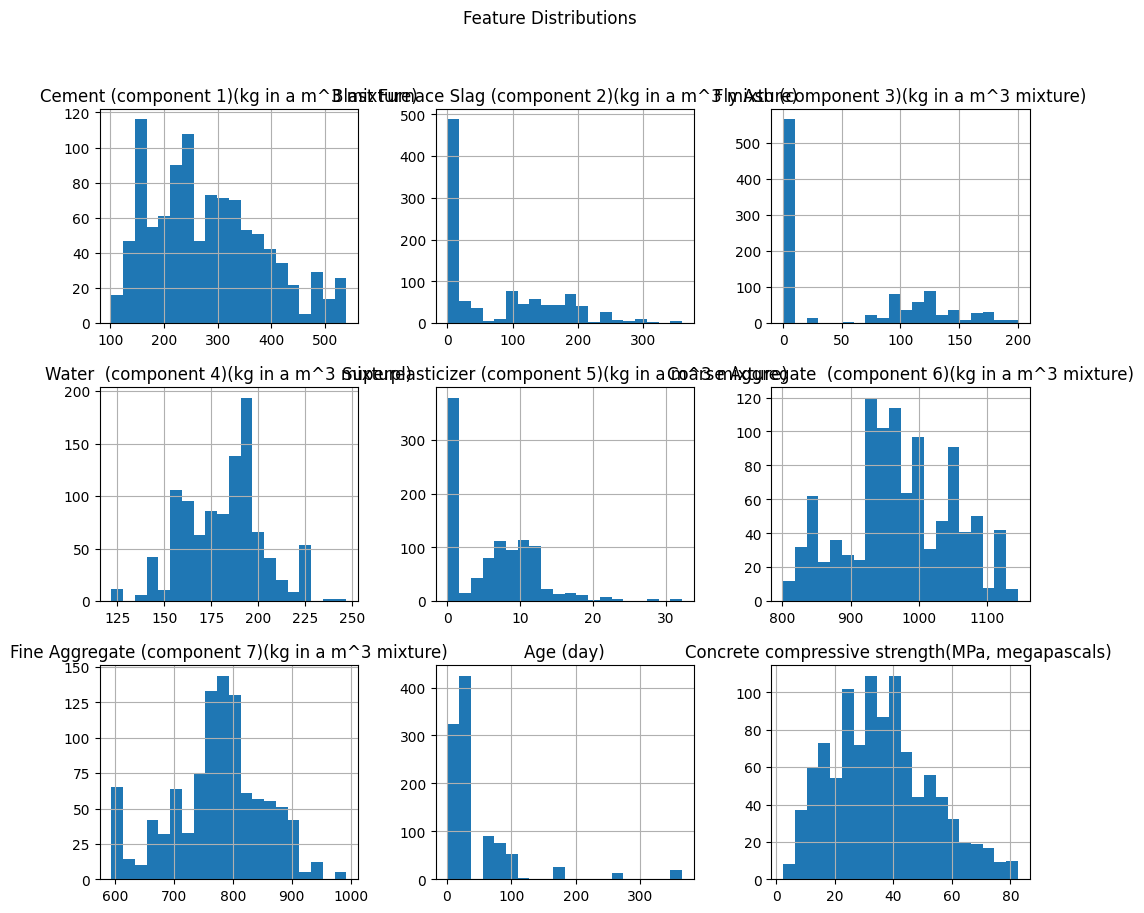

In [7]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


Boxplots to Spot Outliers


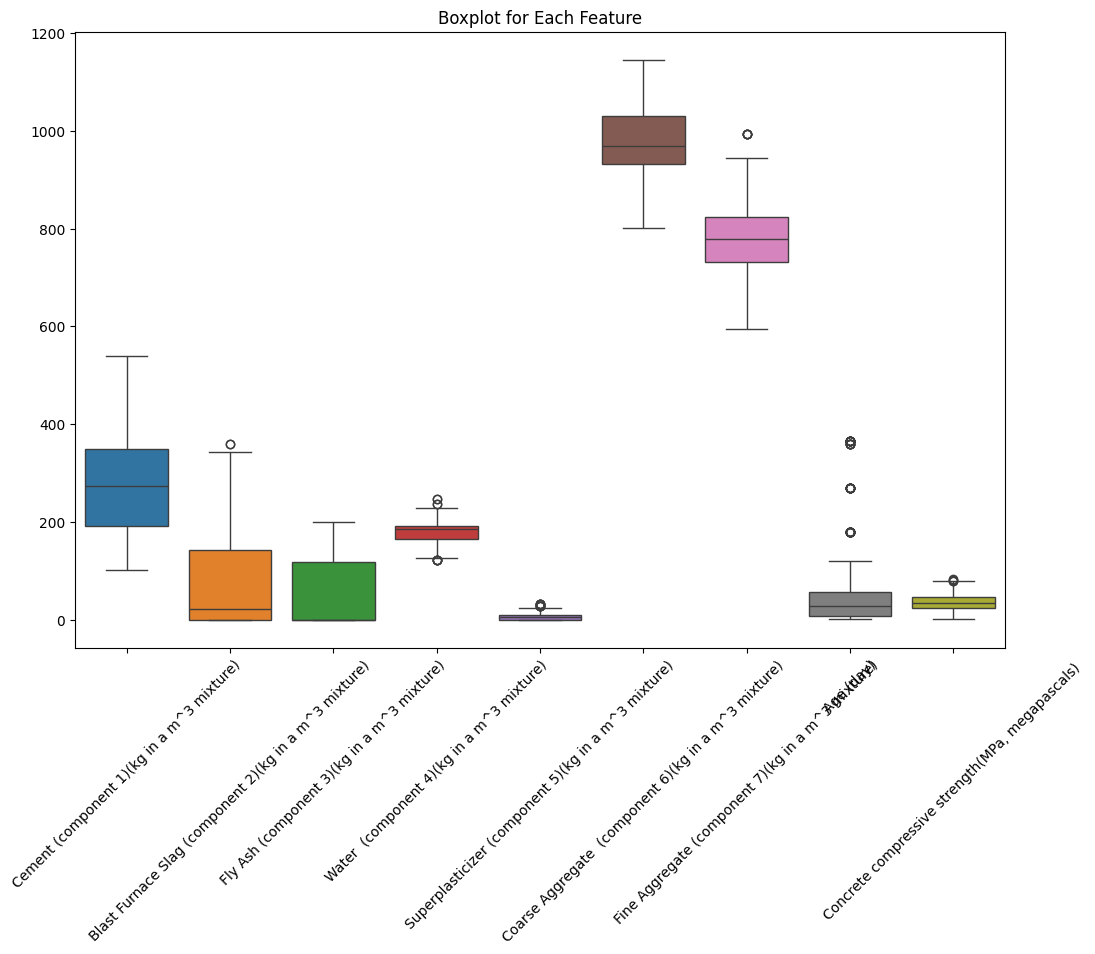

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot for Each Feature")
plt.show()


4. Correlation Heatmap

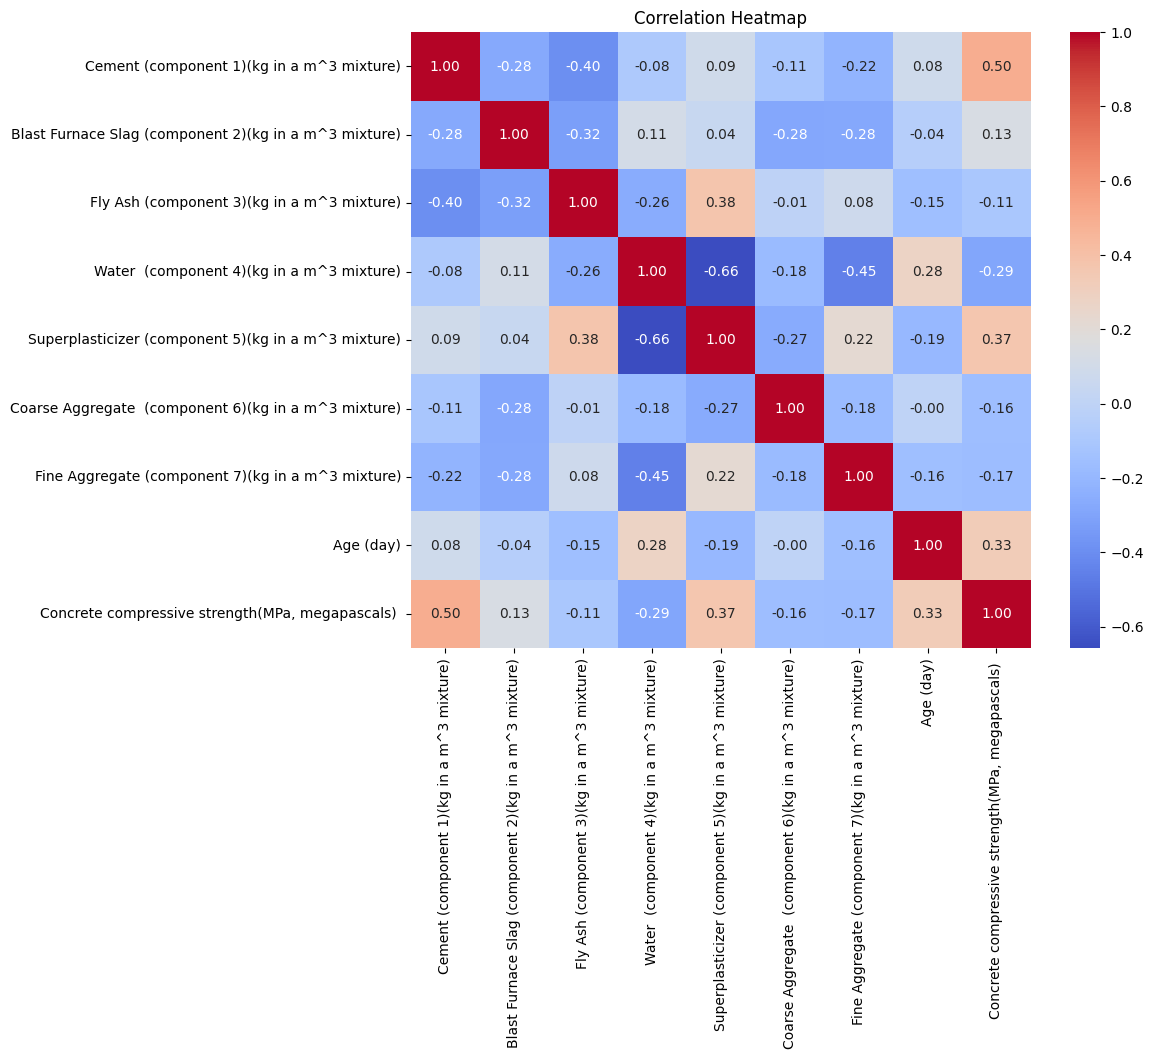

In [11]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


5. Scatter Plots (Each Feature vs. Target)

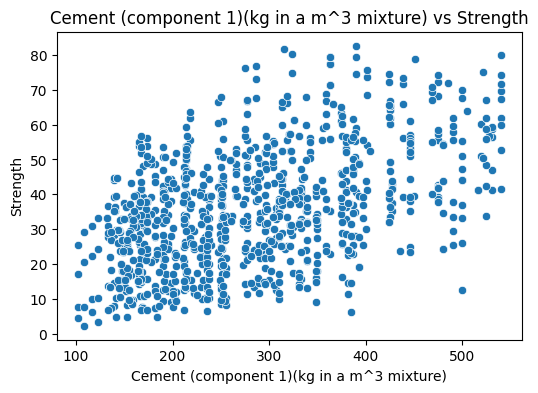

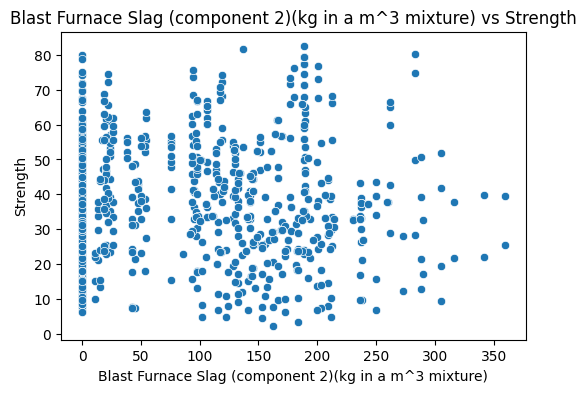

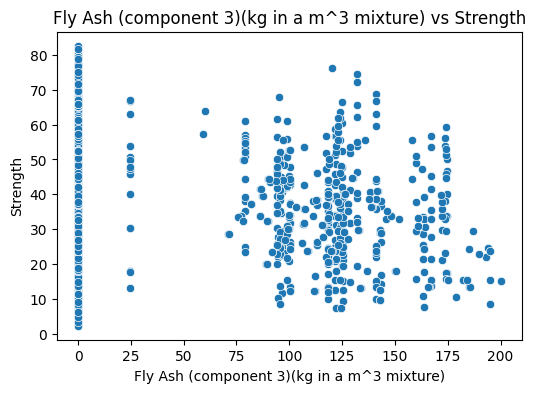

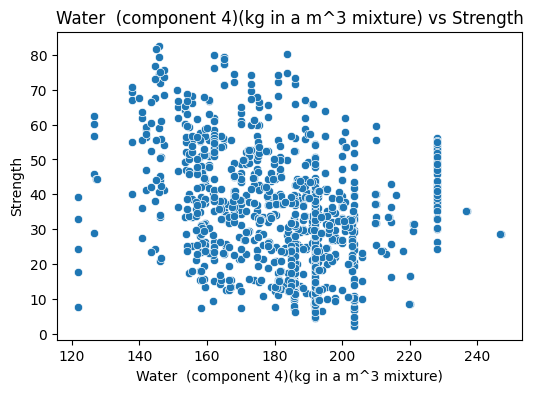

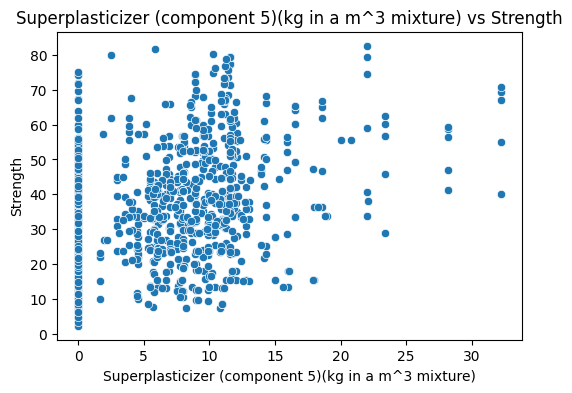

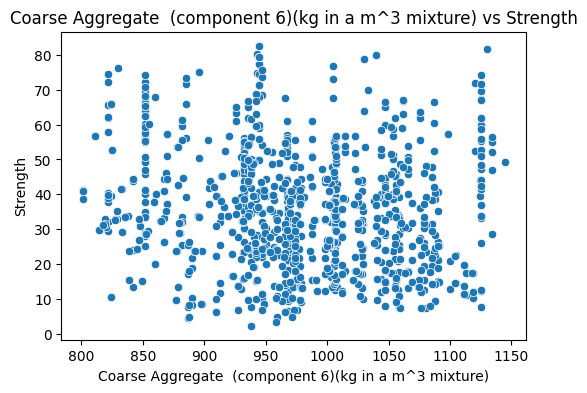

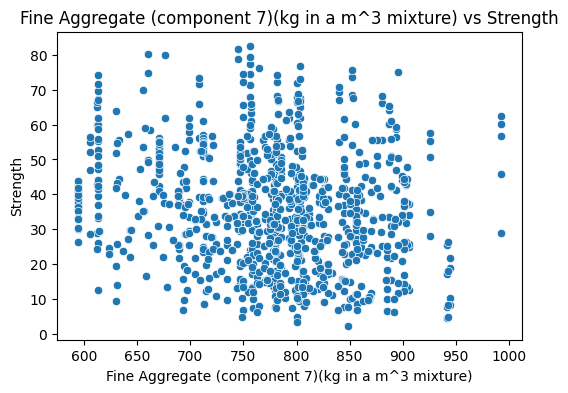

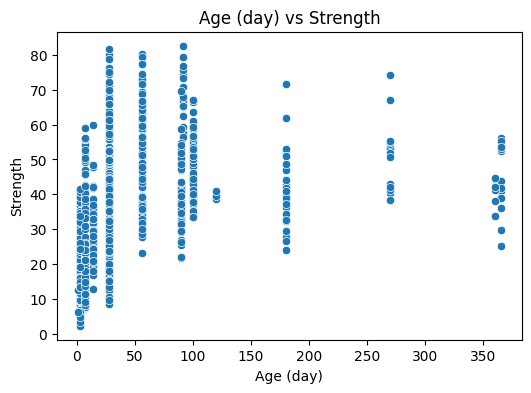

In [19]:
for col in data.columns[:-1]:  # Skip Strength
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[col], y=data['Strength'])
    plt.title(f"{col} vs Strength")
    plt.show()


Change the target name



In [14]:
data.rename(columns={'Concrete compressive strength(MPa, megapascals)': 'Strength'}, inplace=True)


In [15]:
print(data.columns)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [16]:
data.columns = data.columns.str.strip()


In [17]:
data.rename(columns={'Concrete compressive strength(MPa, megapascals)': 'Strength'}, inplace=True)


In [18]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Strength'],
      dtype='object')


7. Age Categories (if needed)
You can bin the Age into groups to see how concrete strength changes over curing time:

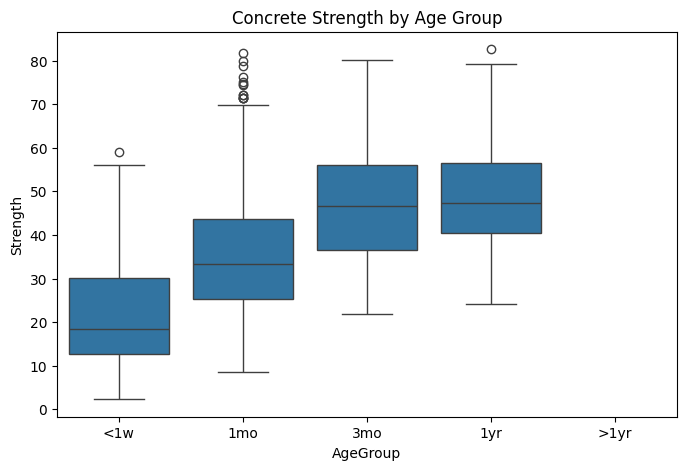

In [21]:
data['AgeGroup'] = pd.cut(data['Age (day)'], bins=[0, 7, 28, 90, 365, 1000],
                          labels=['<1w', '1mo', '3mo', '1yr', '>1yr'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='AgeGroup', y='Strength', data=data)
plt.title("Concrete Strength by Age Group")
plt.show()


Detect Outliers in Fine Aggregate

In [23]:
Q1 = data['Fine Aggregate (component 7)(kg in a m^3 mixture)'].quantile(0.25)
Q3 = data['Fine Aggregate (component 7)(kg in a m^3 mixture)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'] < lower_bound) | (data['Fine Aggregate (component 7)(kg in a m^3 mixture)'] > upper_bound)]
print(outliers)


     Cement (component 1)(kg in a m^3 mixture)  \
74                                       375.0   
97                                       375.0   
120                                      375.0   
143                                      375.0   
166                                      375.0   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
74                                                93.8       
97                                                93.8       
120                                               93.8       
143                                               93.8       
166                                               93.8       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
74                                          0.0   
97                                          0.0   
120                                         0.0   
143                                         0.0   
166                                         0.0   

     Water  (compon

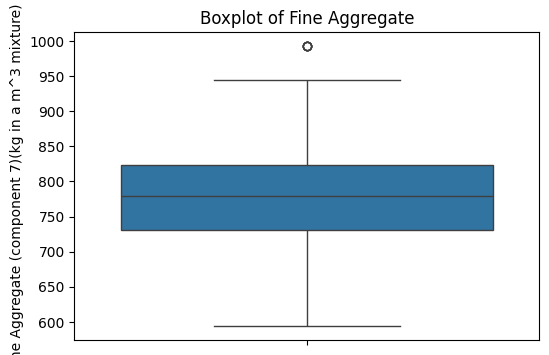

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['Fine Aggregate (component 7)(kg in a m^3 mixture)'])
plt.title("Boxplot of Fine Aggregate")
plt.show()


# Scale the Data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Strength', axis=1))
y = data['Strength']


In [28]:
# Check for non-numeric columns
print(data.dtypes)


Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Strength                                                 float64
dtype: object


In [27]:
data.drop('AgeGroup', axis=1, inplace=True)


# 2. Split the Data

In [30]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Strength', axis=1)
y = data['Strength']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale Features


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# TRAINING


 **1. Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Predict
y_pred_lr = lr_model.predict(X_scaled)

# Evaluation
mse_lr = mean_squared_error(y, y_pred_lr)
r2_lr = r2_score(y, y_pred_lr)

print("🔵 Linear Regression:")
print(f"  - Mean Squared Error: {mse_lr:.2f}")
print(f"  - R² Score: {r2_lr:.2f}")


🔵 Linear Regression:
  - Mean Squared Error: 107.20
  - R² Score: 0.62


**2. Decision Tree Regressor**

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_scaled, y)

# Predict
y_pred_dt = dt_model.predict(X_scaled)

# Evaluation
mse_dt = mean_squared_error(y, y_pred_dt)
r2_dt = r2_score(y, y_pred_dt)

print("🌳 Decision Tree:")
print(f"  - Mean Squared Error: {mse_dt:.2f}")
print(f"  - R² Score: {r2_dt:.2f}")


🌳 Decision Tree:
  - Mean Squared Error: 1.10
  - R² Score: 1.00


**3. Neural Network (MLPRegressor)**

In [34]:
from sklearn.neural_network import MLPRegressor

# Train
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_scaled, y)

# Predict
y_pred_mlp = mlp_model.predict(X_scaled)

# Evaluation
mse_mlp = mean_squared_error(y, y_pred_mlp)
r2_mlp = r2_score(y, y_pred_mlp)

print("🤖 Neural Network:")
print(f"  - Mean Squared Error: {mse_mlp:.2f}")
print(f"  - R² Score: {r2_mlp:.2f}")


🤖 Neural Network:
  - Mean Squared Error: 15.50
  - R² Score: 0.94


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔵 Linear Regression on Test Set:")
print(f"  - Mean Squared Error: {mse_lr:.2f}")
print(f"  - R² Score: {r2_lr:.2f}")


🔵 Linear Regression on Test Set:
  - Mean Squared Error: 95.97
  - R² Score: 0.63


In [37]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("🌳 Decision Tree on Test Set:")
print(f"  - Mean Squared Error: {mse_dt:.2f}")
print(f"  - R² Score: {r2_dt:.2f}")


🌳 Decision Tree on Test Set:
  - Mean Squared Error: 42.58
  - R² Score: 0.83


In [38]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("🤖 Neural Network on Test Set:")
print(f"  - Mean Squared Error: {mse_mlp:.2f}")
print(f"  - R² Score: {r2_mlp:.2f}")


🤖 Neural Network on Test Set:
  - Mean Squared Error: 33.18
  - R² Score: 0.87


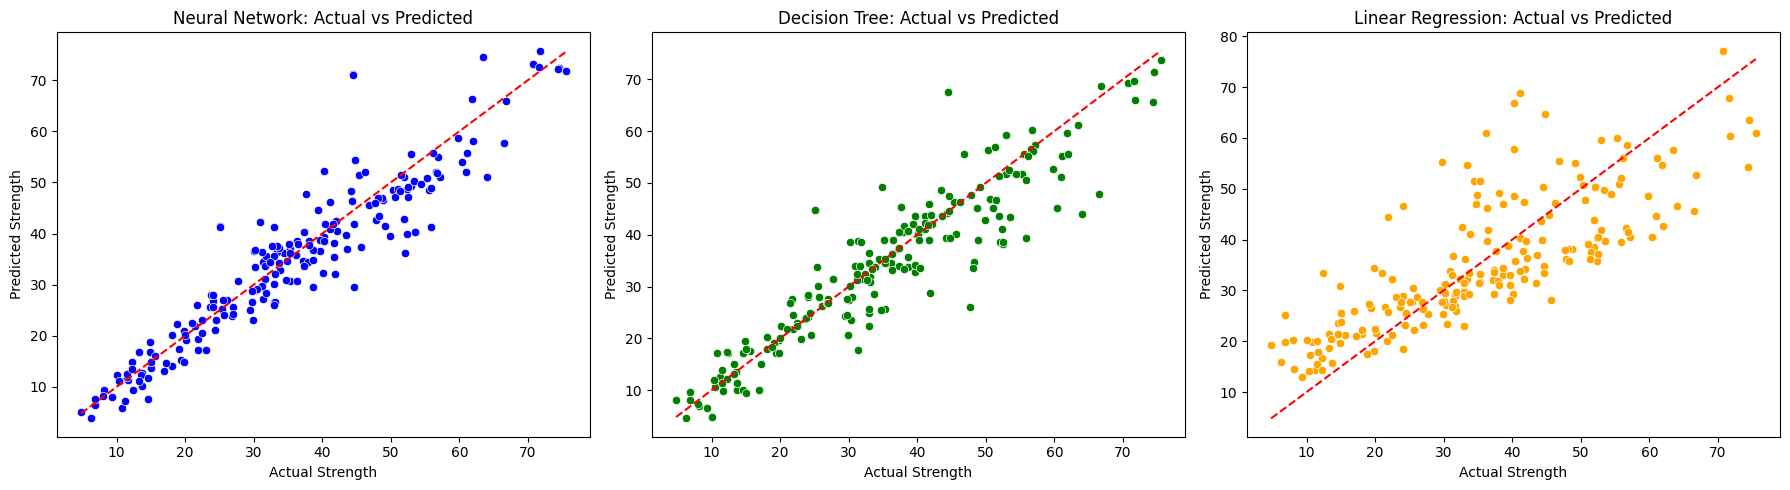

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred_nn = model_nn.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

# Plot predictions vs actuals
plt.figure(figsize=(18, 5))

# Neural Network
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_nn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Neural Network: Actual vs Predicted")

# Decision Tree
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Decision Tree: Actual vs Predicted")

# Linear Regression
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lr, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Linear Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Neural Network
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model_nn.fit(X_train, y_train)

# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()